# Visualization of Retail Data
Using dataset of retail sales over the past 45 years to see trends

#### Import libs

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

# visualization libs
import seaborn as sns
import matplotlib.pyplot as pl
import calendar

#### Import datasets

In [10]:
feature_file = 'Features data set.csv'
sales_file = 'sales data-set.csv'
stores_file = 'stores data-set.csv'
feature_df = pd.read_csv(feature_file)
sales_df = pd.read_csv(sales_file)
stores_df = pd.read_csv(stores_file)

#### Look at columns for the DataFrames 

In [7]:
print(feature_df.columns.tolist())

['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


In [8]:
print(sales_df.columns.tolist())

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']


In [11]:
print(stores_df.columns.tolist())

['Store', 'Type', 'Size']


In [14]:
# Convert the dates to datetime 
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
feature_df['Date'] = pd.to_datetime(feature_df['Date'])

#### Weekly sales for each stores

Text(0.04, 0.5, 'Number')

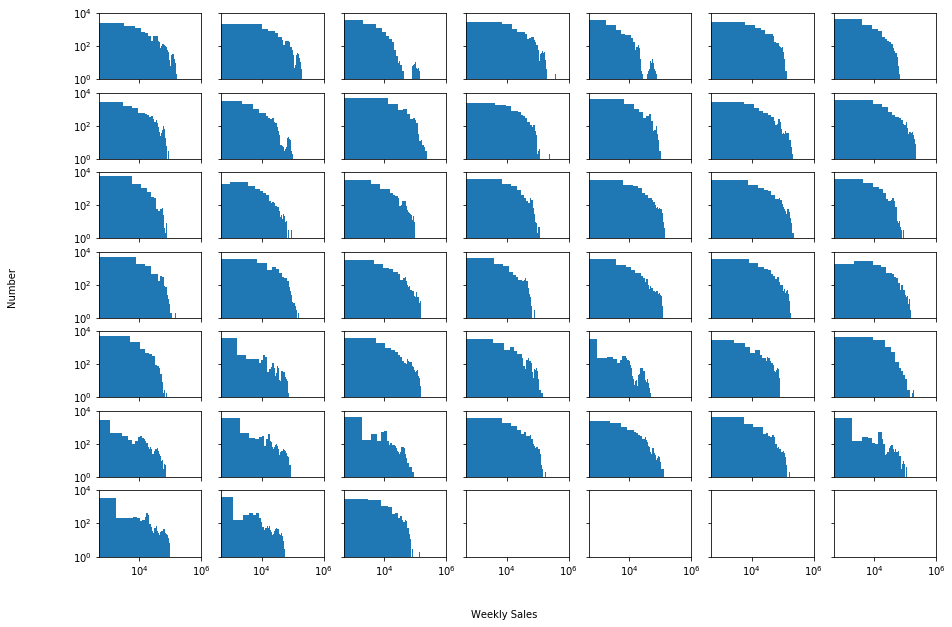

In [17]:
fig, axarr = pl.subplots(7, 7, sharex=True, sharey=True,figsize=(15,10))
s = 1
for i in range(0, 7):
    for j in range(0, 7):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[sales_df['Store'] == s], 50);
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_ylim(1,1e4)
        axarr[i,j].set_xlim(5e2,1e6)

        s += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

#### Weekly sales for weeks including hoilday or not

/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invali

Text(0.04, 0.5, 'Normalized umber')

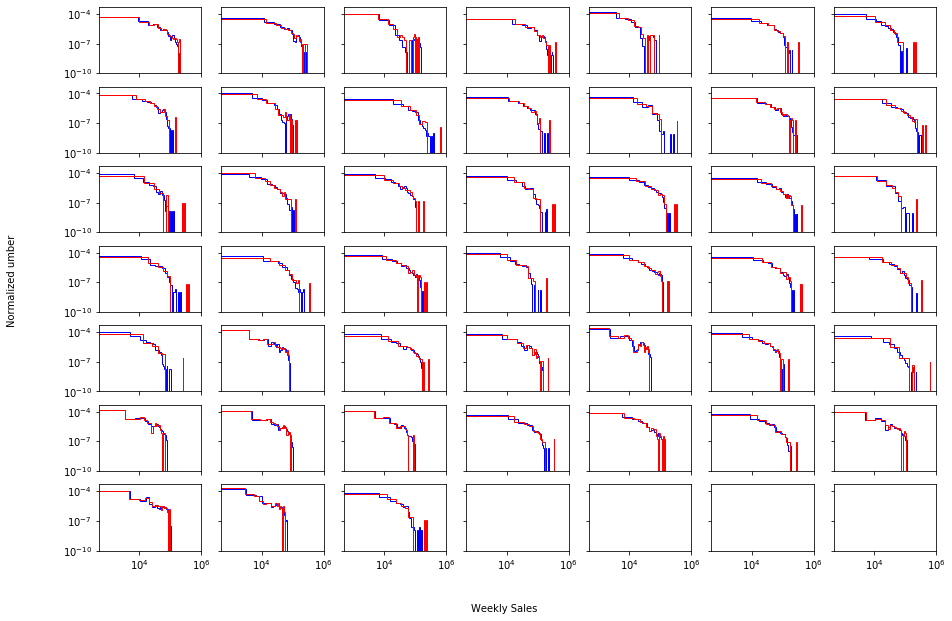

In [21]:
fig, axarr = pl.subplots(7, 7, sharex=True, sharey=True,figsize=(15,10))
s = 1
for i in range(0, 7):
    for j in range(0, 7):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['Store'] == s) & 
                             (sales_df['IsHoliday'] == False)], 20, color='b', density=True, histtype='step')
        
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['Store'] == s) & 
                             (sales_df['IsHoliday'] == True)], 20, color='r', density=True, histtype='step')
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        #axarr[i,j].set_ylim(1,1e4)
        axarr[i,j].set_ylim(1e-10,5e-4)
        axarr[i,j].set_xlim(5e2,1e6)

        s += 1
        
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Normalized umber', va='center', rotation='vertical')

#### Distribution of monthly sales for store 1 including all departments

Text(0.04, 0.5, 'Number')

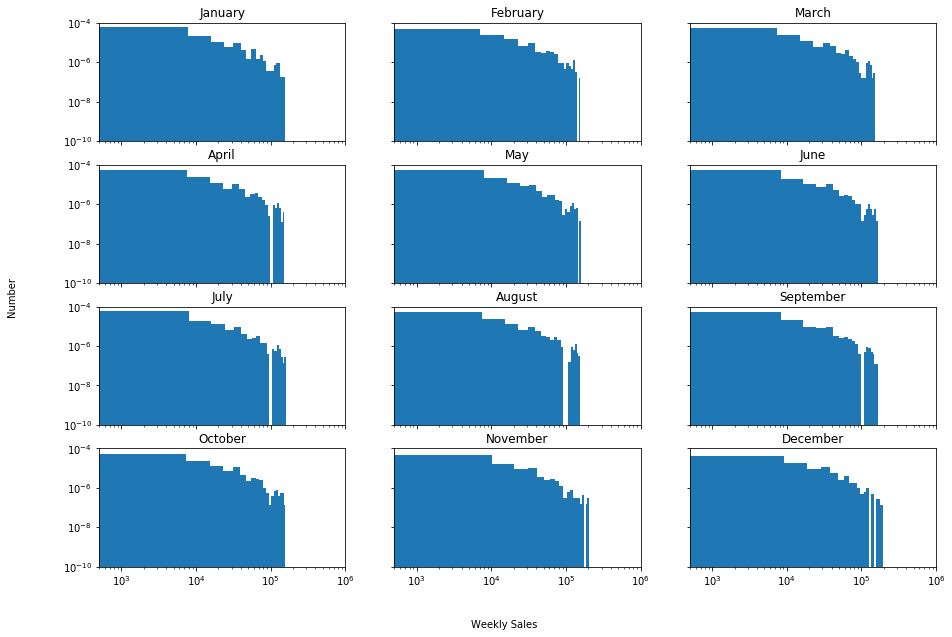

In [24]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['Store'] == s) & 
                            (sales_df['Date'].dt.month == m)], 20, density=True);
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_xlim(5e2,1e6)
        #axarr[i,j].set_ylim(1,1e4)
        axarr[i,j].set_ylim(1e-10,1e-4)
        axarr[i,j].set_title('%s'%calendar.month_name[m])
        m += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')


#### Distribution of monthly sales for store 1 by 2010, 2011, 2012

Text(0.04, 0.5, 'Number')

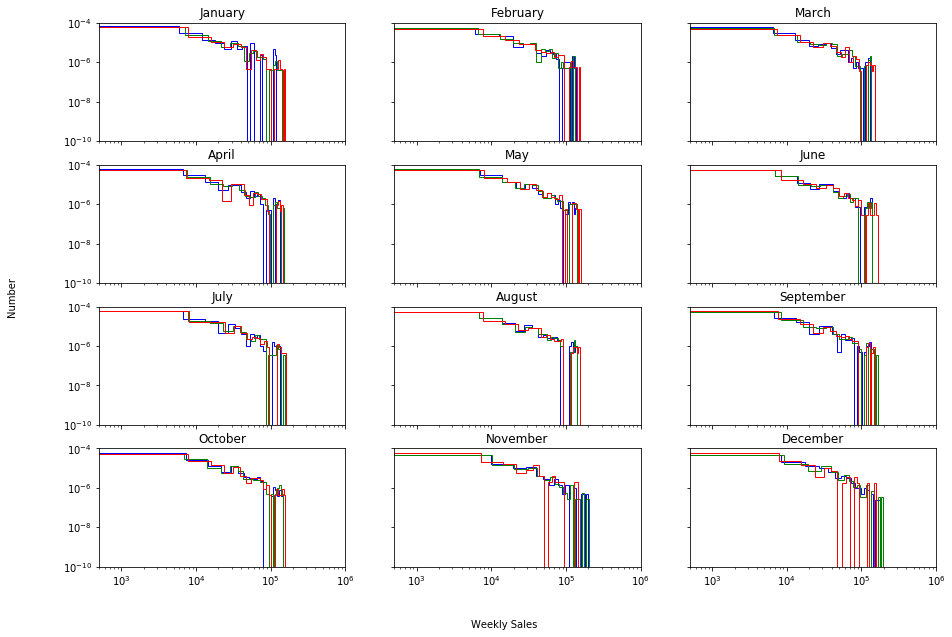

In [26]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['Store'] == s) & 
                             (sales_df['Date'].dt.year == 2010) & 
                             (sales_df['Date'].dt.month == m)], 20, color='b', 
                              histtype='step', density=True);
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['Store'] == s) & 
                             (sales_df['Date'].dt.year == 2011) & 
                             (sales_df['Date'].dt.month == m)], 20, color='g', 
                              histtype='step', density=True);
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['Store'] == s) & 
                             (sales_df['Date'].dt.year == 2012) & 
                             (sales_df['Date'].dt.month == m)], 20, color='r', 
                              histtype='step', density=True);

        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_ylim(1e-10,1e-4)
        axarr[i,j].set_xlim(5e2,1e6)
        axarr[i,j].set_title('%s'%calendar.month_name[m])
        m += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

In [29]:
# Segment and sorting data into bins
stores_df['SizeBand'] = pd.cut(stores_df['Size'], bins=4, labels=np.arange(1, 5)).astype(np.int)

In [30]:
# Storing the store size and type as dictionaries 
storeSizeDict = stores_df.set_index('Store').to_dict()['SizeBand']
storeTypeDict = stores_df.set_index('Store').to_dict()['Type']

In [32]:
# Mapping the dictionaries to columns in the df
sales_df['SizeBand'] = sales_df['Store']
sales_df['SizeBand'] = sales_df['SizeBand'].map(storeSizeDict)
sales_df['Type'] = sales_df['Store'].map(storeTypeDict)

#### Sum of weekly sales for month for 2010-2012

Text(0.04, 0.5, 'Number')

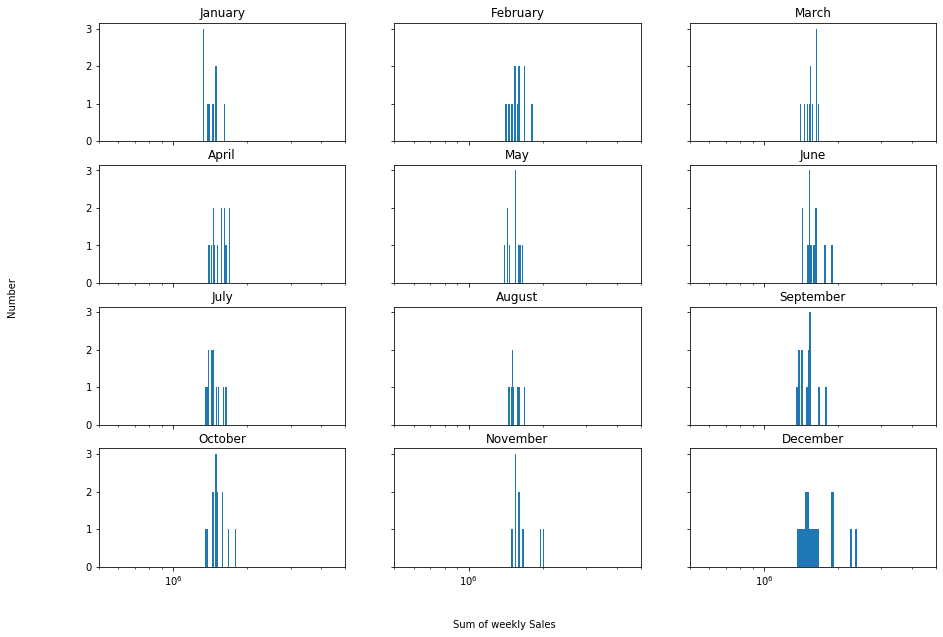

In [34]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        tdf = sales_df.loc[(sales_df['Store'] == s) & (sales_df['Date'].dt.month == m)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20);
        axarr[i,j].set_title('%s'%calendar.month_name[m])
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_xlim(5e5,5e6)
        m += 1
fig.text(0.5, 0.04, 'Sum of weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

#### Monthly sales by 2010, 2011 and 2012 separately

Text(0.04, 0.5, 'Number')

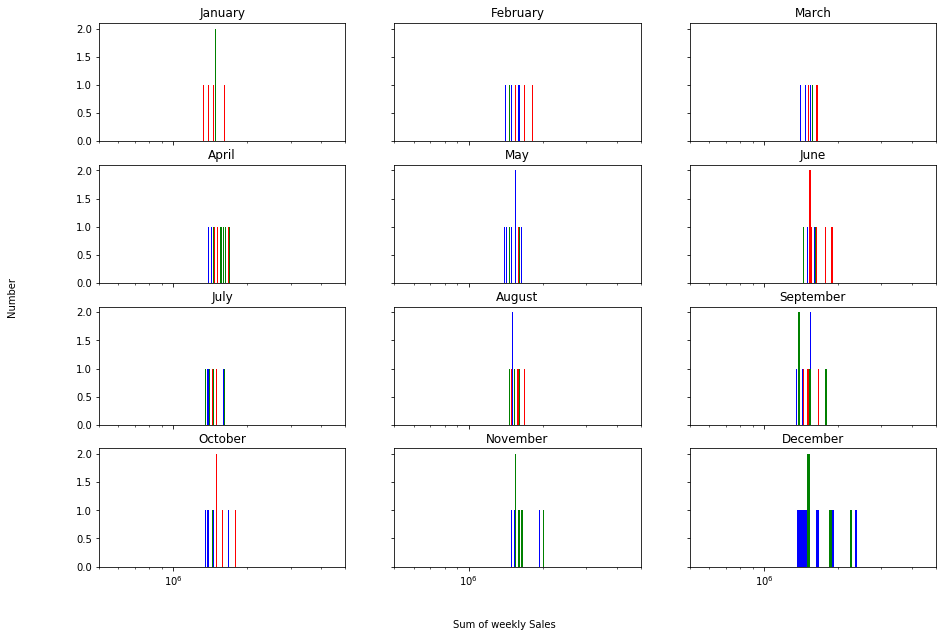

In [36]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 4):
    for j in range(0, 3):
        tdf = sales_df.loc[(sales_df['Store'] == s) 
                             & (sales_df['Date'].dt.month == m) 
                             & (sales_df['Date'].dt.year == 2010)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20, color='b');#, histtype='step');
        
        tdf = sales_df.loc[(sales_df['Store'] == s) 
                             & (sales_df['Date'].dt.month == m) 
                             & (sales_df['Date'].dt.year == 2011)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20, color='g');#, histtype='step');
        
        tdf = sales_df.loc[(sales_df['Store'] == s) 
                             & (sales_df['Date'].dt.month == m) 
                             & (sales_df['Date'].dt.year == 2012)]
        tdf = tdf.groupby('Date')['Weekly_Sales'].sum().reset_index()
        xxx = axarr[i,j].hist(tdf['Weekly_Sales'], 20, color='r');#, histtype='step');
        axarr[i,j].set_title('%s'%calendar.month_name[m])
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_xlim(5e5,5e6)
        m += 1
fig.text(0.5, 0.04, 'Sum of weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Number', va='center', rotation='vertical')

#### Weekly sales by size of stores

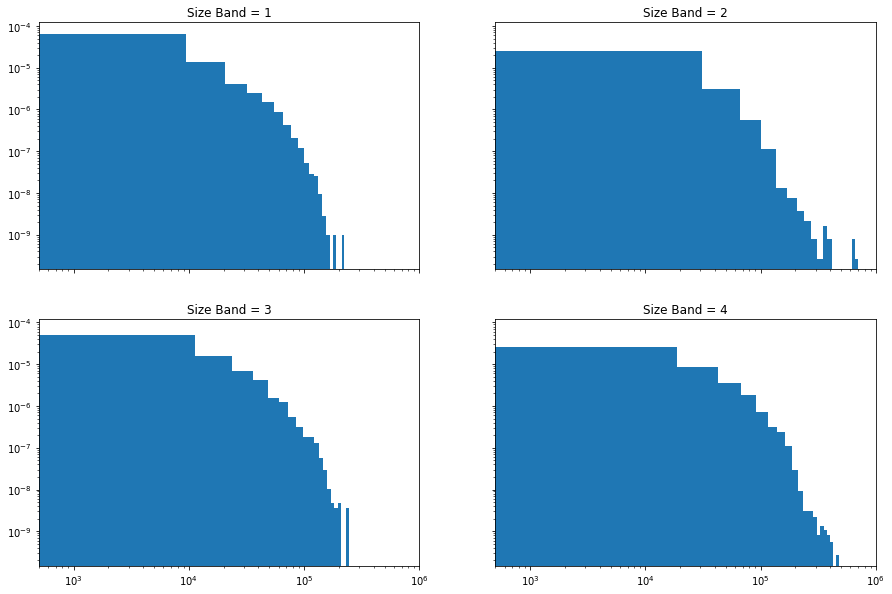

In [38]:
fig, axarr = pl.subplots(2, 2, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 2):
    for j in range(0, 2):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['SizeBand'] == m)], 
                              20, density=True)
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        #axarr[i,j].set_ylim(1,1e6)
        axarr[i,j].set_xlim(5e2,1e6)
        axarr[i,j].set_title('Size Band = %d'%m)
        m += 1

#### Weekly sales by holiday weekends and size of the stores 
The distributions of weekly sales depends on whether or not the week will have a holiday or not

Text(0.04, 0.5, 'Normalized umber (Red/Blue:Holiday/Non)')

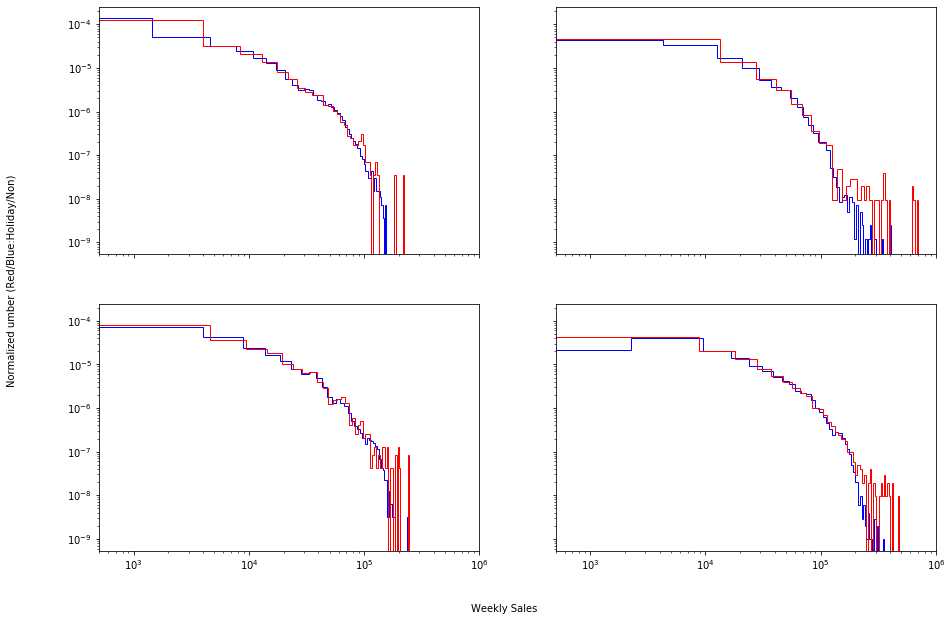

In [40]:
fig, axarr = pl.subplots(2, 2, sharex=True, sharey=True,figsize=(15,10))
s, m = 1, 1
for i in range(0, 2):
    for j in range(0, 2):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['SizeBand'] == m) & 
                             (sales_df['IsHoliday'] == False)], 50, color='b', 
                              density=True, histtype='step')
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['SizeBand'] == m) & 
                             (sales_df['IsHoliday'] == True)], 50, color='r', 
                              density=True, histtype='step')
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        #axarr[i,j].set_ylim(1,1e4)
        axarr[i,j].set_xlim(5e2,1e6)

        m += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Normalized umber (Red/Blue:Holiday/Non)', va='center', rotation='vertical')

#### Distributions of weekly sales by size and holiday
There is not difference between the distributions of weekly sale for small size stores even if we divided the stores by type. However, there is marginal differnce between these distributions for large sized stores

/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/jakeimyak/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invali

Text(0.04, 0.5, 'Normalized umber (Red/Blue:Holiday/Non)')

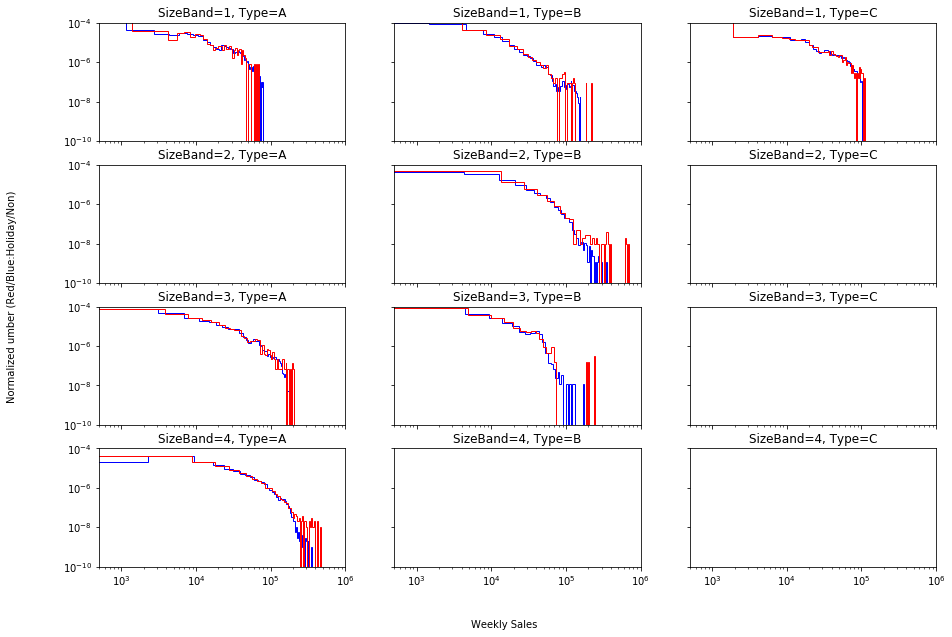

In [41]:
fig, axarr = pl.subplots(4, 3, sharex=True, sharey=True,figsize=(15,10))
s, m = ['A', 'B', 'C'], 1
for i in range(0, 4):
    for j in range(0, 3):
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['SizeBand'] == m) 
                              & (sales_df['Type'] == s[j]) & (sales_df['IsHoliday'] == False)], 50, 
                              density=True, color='b', histtype='step');
        xxx = axarr[i,j].hist(sales_df['Weekly_Sales'].loc[(sales_df['SizeBand'] == m) 
                              & (sales_df['Type'] == s[j]) & (sales_df['IsHoliday'] == True)], 50, 
                              density=True, color='r', histtype='step');
        axarr[i,j].set_yscale('log')
        axarr[i,j].set_xscale('log')
        axarr[i,j].set_ylim(1e-10,1e-4)
        axarr[i,j].set_xlim(5e2,1e6)
        axarr[i,j].set_title('SizeBand=%d, Type=%s'%(m, s[j]))
    m += 1
fig.text(0.5, 0.04, 'Weekly Sales', ha='center')
fig.text(0.04, 0.5, 'Normalized umber (Red/Blue:Holiday/Non)', va='center', rotation='vertical')

#### Combine features and sales dataframes

In [43]:
sales_feature_df = sales_df.merge(feature_df, left_on=('Store', 'Date'), 
                                 right_on=('Store', 'Date'), how='left')

In [45]:
sales_feature_df.columns.tolist()

['Store',
 'Dept',
 'Date',
 'Weekly_Sales',
 'IsHoliday_x',
 'SizeBand',
 'Type',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'IsHoliday_y']

In [47]:
sales_feature_df.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [49]:
# Removing IsHoliday_y and remain IsHoliday_x
sales_feature_df = sales_feature_df.drop(['IsHoliday_y'], axis=1)
sales_feature_df = sales_feature_df.rename(columns = {'IsHoliday_x':'IsHoliday'})
sales_feature_df['IsHoliday'] = sales_feature_df['IsHoliday'].astype(int)

In [50]:
# Compute the correlation matrix
corr = sales_feature_df.drop(['Store', 'Dept'], axis=1).corr()
# Generate a mask for the upper triangle
# For seaborn visualization 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

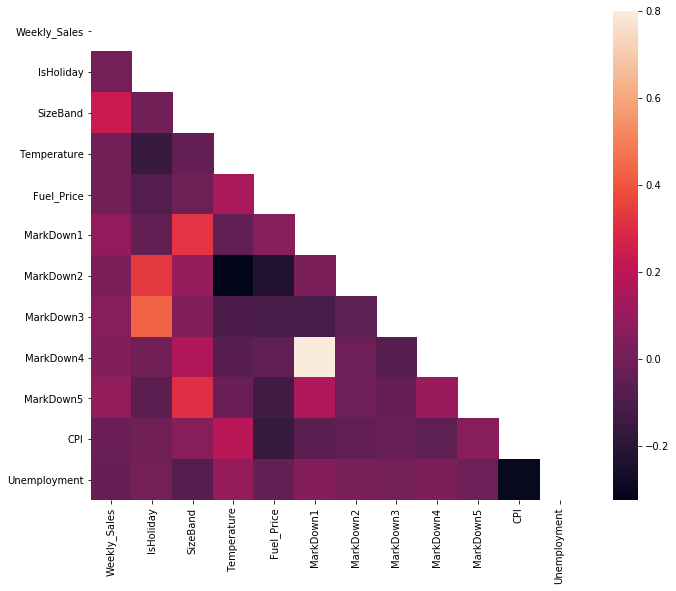

In [52]:
#correlation matrix
f, ax = pl.subplots(figsize=(12, 9))
sns.heatmap(sales_feature_df.drop(['Store', 'Dept'], axis=1).corr(), mask=mask, vmax=.8, square=True);

It is seen that there is a positive correlation between holiday weekends and markdown 2 and 3.

There is positive correlation between the size of the store and the MarkDown 1, 4 and 4

There is a positive correlation between size of the store and the weekly sales. However, it may be a systematic correlation as there are many employees needs to be worked for a larger store.

There is a marginal positive correlation between the fuel price and MarkDown 1 but all other MarkDowns are negatively correlated with fuel price.

Temperature of the region is mostly anticorrelated with the MarkDowns and no correlation between weekly sales

CPI and unemployment are marginally anticorrelated with MarkDowns and no correlation between weekly sales

#### How the type of stores have correlation
Similar conclusions for A and B type of stores can be derived. There are slight difference between these conclusion and C type stores

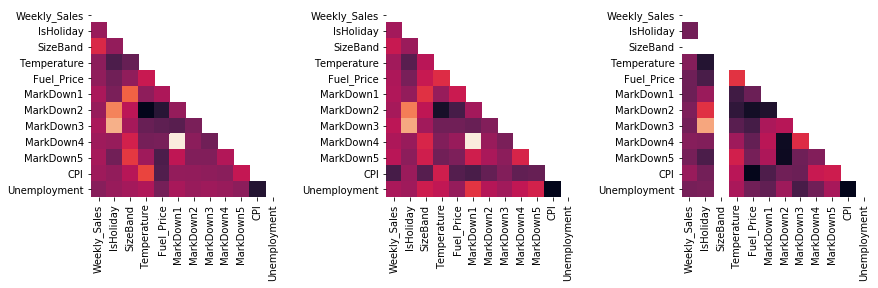

In [55]:
#correlation matrix
fig, axarr = pl.subplots(1,3, figsize=(15, 3.5))
sns.heatmap(sales_feature_df.drop(['Store', 'Dept'], axis=1)[sales_feature_df.Type == 'A'].corr(), mask=mask, vmax=.6, 
            square=True, ax=axarr[0], cbar=None);
sns.heatmap(sales_feature_df.drop(['Store', 'Dept'], axis=1)[sales_feature_df.Type == 'B'].corr(), mask=mask, vmax=.6, 
            square=True, ax=axarr[1], cbar=None);
sns.heatmap(sales_feature_df.drop(['Store', 'Dept'], axis=1)[sales_feature_df.Type == 'C'].corr(), mask=mask, vmax=.6, 
            square=True, ax=axarr[2], cbar=None);